In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

In [14]:
# use python lib
# from sklearn.datasets import load_iris
# X, y = load_iris(return_X_y=True)
# y

data = pd.read_csv('iris.csv')
X = data.drop('species', axis=1)
y = data['species']
y.unique()



array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import joblib

data = pd.read_csv('iris.csv')
X = data.drop('species', axis=1)
y = data['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create a Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy scores
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(f"Out-of-Bag Accuracy: {rf_model.oob_score_:.2f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

joblib.dump(rf_model, 'random_forest_model.lib')

Model Accuracy: 1.00
Out-of-Bag Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



['random_forest_model.lib']

In [23]:
import joblib
load_rf = joblib.load('random_forest_model.lib')

# 1
# this gives warning
#                  sepal_length	, sepal_width	, petal_length,  petal_width
# pred = load_rf.predict([[5.1, 3.5, 1.4, 0.2]])


# without warning
new_sample = pd.DataFrame(
    [[5.1, 3.5, 1.4, 0.2]],
    columns=["sepal_length", "sepal_width", "petal_length", "petal_width"]
)

pred = load_rf.predict(new_sample)


print(pred[0])

setosa


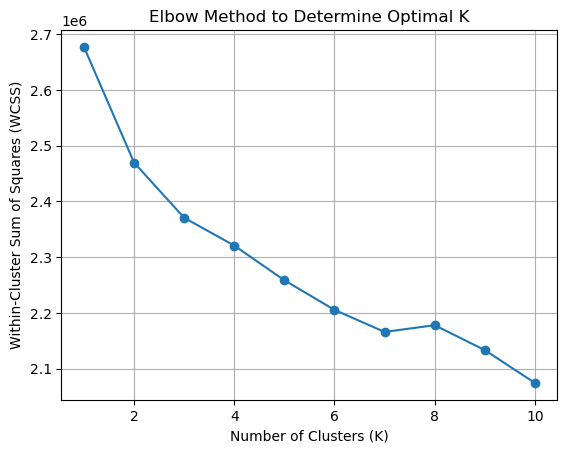

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.1857    ,
        -2.80655022,  2.80655022],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -0.1857    ,
         0.35630932, -0.35630932]])

In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
  
df = pd.read_csv("bank-full.csv")
  
# Convert categorical columns to binary using one-hot encoding
df_dummies = pd.get_dummies(df)
df_dummies.columns

# Apply feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dummies)
  
# Calculate the sum of squared distances (SSD) for K values from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    ssd.append(kmeans.inertia_)
  
# Elbow method plot
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method to Determine Optimal K")
plt.grid(True)
plt.show()

df_scaled

In [36]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
  
# Load the data
df = pd.read_csv("bank-full.csv")
  
# 1. Data preprocessing
# Handle categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
  
# Scale numerical features
scaler = StandardScaler()
features = df_encoded.columns
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=features)
  
# 2. Apply K-means with k=6 (as determined by your elbow method)
k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)
  
# 3.1 Size of each cluster
cluster_sizes = df['cluster'].value_counts().sort_index()
print("\nCluster sizes:")
print(cluster_sizes)
print("\nPercentage of total:")
print(round(cluster_sizes / len(df) * 100, 2))
  
# 3.2 Calculate mean values for numerical variables by cluster
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                  'euribor3m', 'nr.employed']
cluster_means = df.groupby('cluster')[numerical_cols].mean()
print("\nNumerical feature means by cluster:")
print(cluster_means)


Cluster sizes:
cluster
0    11622
1     3775
2    11482
3     1498
4    11836
5      975
Name: count, dtype: int64

Percentage of total:
cluster
0    28.22
1     9.17
2    27.88
3     3.64
4    28.74
5     2.37
Name: count, dtype: float64

Numerical feature means by cluster:
               age    duration  campaign       pdays  previous  emp.var.rate  \
cluster                                                                        
0        39.940458  251.873516  3.062984  999.000000  0.000000      1.399871   
1        40.948079  243.476026  1.920265  999.000000  0.206623     -0.285854   
2        39.285752  263.408465  2.125588  999.000000  0.321982     -2.005766   
3        41.857143  321.419893  1.825768    7.329773  1.668224     -2.094660   
4        40.299510  257.087783  2.809902  999.000000  0.000084      1.200701   
5        39.977436  249.244103  2.572308  979.665641  0.150769      0.142564   

         cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
cluster          

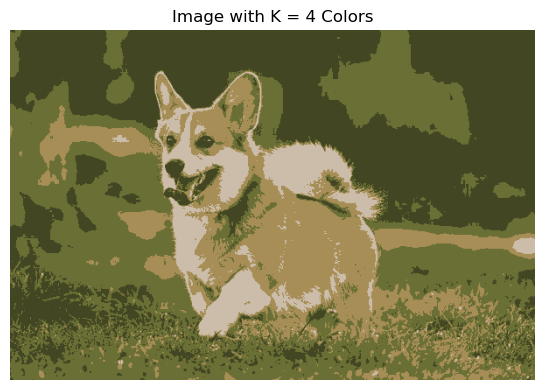

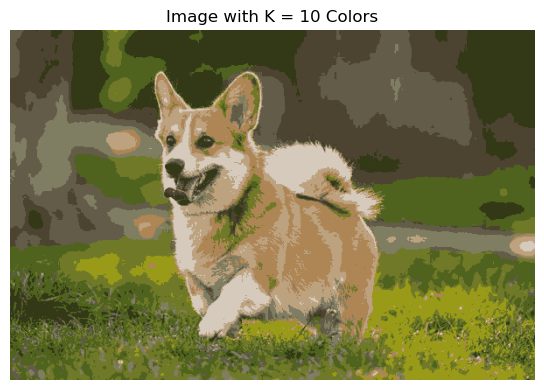

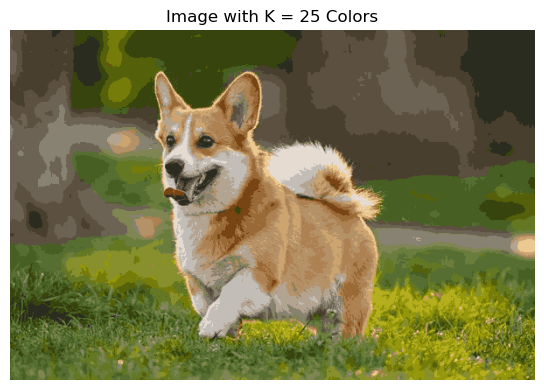

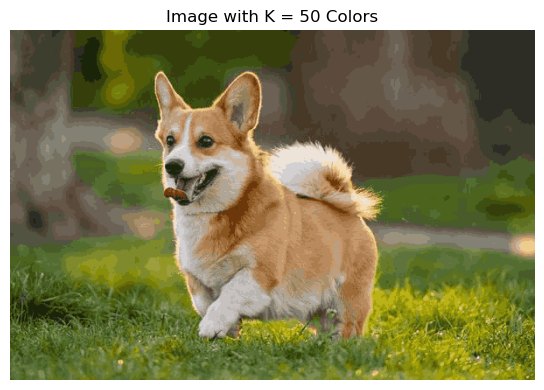

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from PIL import Image

# Load the image
image = Image.open("dog_image.jpeg")
image_np = np.array(image)

# Save original shape
original_shape = image_np.shape

# Reshape to (num_pixels, 3)
pixels = image_np.reshape(-1, 3)

# Define K values to test
k_values = [4, 10, 25, 50]

# Loop over each K and generate quantized image
for k in k_values:
    # Fit KMeans on pixel RGB values
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)

    # Replace each pixel with the centroid color of its cluster
    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    new_image = new_colors.reshape(original_shape).astype(np.uint8)

    # Plot result
    plt.figure(figsize=(6, 4))
    plt.imshow(new_image)
    plt.title(f"Image with K = {k} Colors")
    plt.axis("off")
    plt.tight_layout()
    plt.show()